In [ ]:
"""https://jawadchurn.streamlit.app"""

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modellingcsv/Churn_Modelling.csv


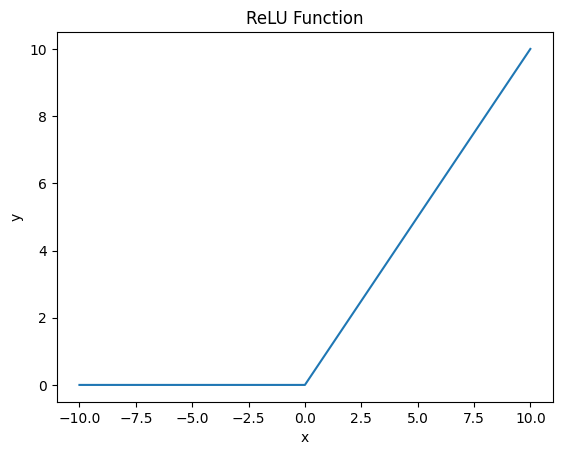

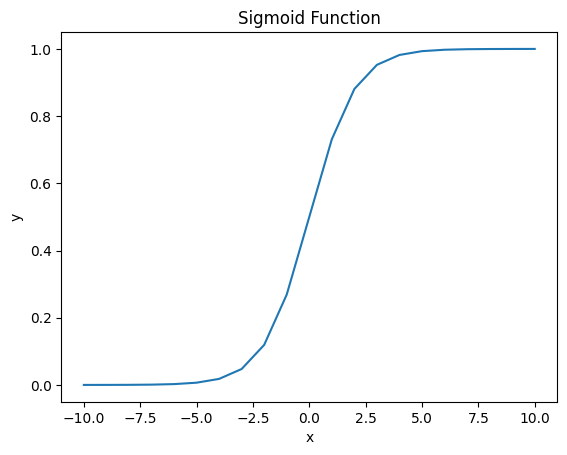

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5610 - loss: 0.6883
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.5010
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.4627
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4382
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8089 - loss: 0.4255
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8017 - loss: 0.4346
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4247
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8087 - loss: 0.4172
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.3993
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8215 - loss: 0.3893
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.3709
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

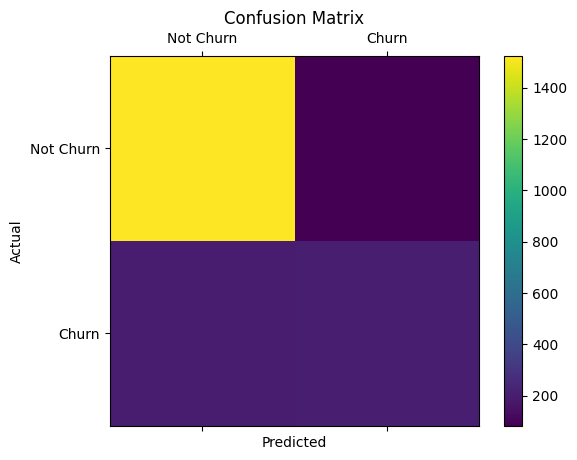

In [7]:
# ===============================
# Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import math

from keras.models import Sequential
from keras.layers import Dense

# ===============================
# Load Dataset
# ===============================
df = pd.read_csv("/kaggle/input/churn-modellingcsv/Churn_Modelling.csv")

# ===============================
# Preprocessing
# ===============================
X = df.iloc[:, 3:13]   # Independent variables
y = df.iloc[:, 13]     # Dependent variable (Exited)

# Encode categorical columns (Geography, Gender)
cat = [1, 2]
cat_cols = pd.get_dummies(X.iloc[:, cat], drop_first=True)

X.drop(X.columns[cat], axis=1, inplace=True)
X = pd.concat([X, cat_cols], axis=1)

# ===============================
# Train Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# Feature Scaling
# ===============================
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ===============================
# ReLU Visualization
# ===============================
def rectified(x):
    return max(0.0, x)

series_in = [x for x in range(-10, 11)]
series_out = [rectified(x) for x in series_in]

pyplot.plot(series_in, series_out)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('ReLU Function')
pyplot.show()

# ===============================
# Sigmoid Visualization
# ===============================
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

series_out = [sigmoid(x) for x in series_in]

pyplot.plot(series_in, series_out)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('Sigmoid Function')
pyplot.show()

# ===============================
# ANN Model
# ===============================
classifier = Sequential()

classifier.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(classifier.summary())

# ===============================
# Train the Model
# ===============================
classifier.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    verbose=1
)

# ===============================
# Predictions
# ===============================
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# ===============================
# Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0,0] + cm[1,1]) / len(y_test) * 100
print("Accuracy:", accuracy)

# ===============================
# Confusion Matrix Plot
# ===============================
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix')
fig.colorbar(cax)

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Not Churn', 'Churn'])
ax.set_yticklabels(['Not Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [8]:
import joblib
# Save model & scaler
classifier.save("churn_ann_model.h5")
joblib.dump(sc, "scaler.pkl")

print("Model & scaler saved successfully")

Model & scaler saved successfully
